Creating and storing the documents and data

In [1]:
import pandas as pd

In [23]:
diagnoses = pd.read_csv('./data/mimic3/D_ICD_DIAGNOSES.csv')
procedures = pd.read_csv('./data/mimic3/D_ICD_PROCEDURES.csv')


print("no of rows in DIAGNOSES :", len(diagnoses))
print("no of rows in PROCEDURES :", len(procedures))

no of rows in DIAGNOSES : 14567
no of rows in PROCEDURES : 3882


In [24]:
diagnoses.head()

,row_id,icd9_code,short_title,long_title
0,1,01716,Erythem nod tb-oth test,Erythema nodosum with hypersensitivity reactio...
1,2,01720,TB periph lymph-unspec,"Tuberculosis of peripheral lymph nodes, unspec..."
2,3,01721,TB periph lymph-no exam,"Tuberculosis of peripheral lymph nodes, bacter..."
3,4,01722,TB periph lymph-exam unk,"Tuberculosis of peripheral lymph nodes, bacter..."
4,5,01723,TB periph lymph-micro dx,"Tuberculosis of peripheral lymph nodes, tuberc..."


In [25]:
procedures.head()

,row_id,icd9_code,short_title,long_title
0,1,1423,Chorioret les xenon coag,Destruction of chorioretinal lesion by xenon a...
1,2,1424,Chorioret les laser coag,Destruction of chorioretinal lesion by laser p...
2,3,1425,Chorioret les p/coag NOS,Destruction of chorioretinal lesion by photoco...
3,4,1426,Chorioret les radiother,Destruction of chorioretinal lesion by radiati...
4,5,1427,Chorioret les rad implan,Destruction of chorioretinal lesion by implant...


In [26]:
diagnoses['icd9_code'] = diagnoses['icd9_code'].astype(str)
procedures['icd9_code'] = procedures['icd9_code'].astype(str)

merged_df = pd.merge(diagnoses, procedures, on='icd9_code', how='inner')

merged_df.head()

,row_id_x,icd9_code,short_title_x,long_title_x,row_id_y,short_title_y,long_title_y
0,864,1289,Helminthiasis NOS,"Helminth infection, unspecified",919,Scleral operation NEC,Other operations on sclera
1,865,129,Intestin parasitism NOS,"Intestinal parasitism, unspecified",136,Rem brain pulse generatr,Removal of cranial neurostimulator pulse gener...
2,866,1300,Toxoplasm meningoenceph,Meningoencephalitis due to toxoplasmosis,926,Remove FB lens NOS,"Removal of foreign body from lens, not otherwi..."
3,867,1301,Toxoplasm conjunctivitis,Conjunctivitis due to toxoplasmosis,927,Magnet remove FB lens,Removal of foreign body from lens with use of ...
4,868,1302,Toxoplasm chorioretinit,Chorioretinitis due to toxoplasmosis,928,Nonmagnet remove FB lens,Removal of foreign body from lens without use ...


In [27]:
merged_df.drop(columns=['row_id_x','row_id_y'], inplace=True)
merged_df.rename(columns={'short_title_x': 'diagnoses_short_title'}, inplace=True)
merged_df.rename(columns={'long_title_x': 'diagnoses_long_title'}, inplace=True)
merged_df.rename(columns={'short_title_y': 'procedure_short_title'}, inplace=True)
merged_df.rename(columns={'long_title_y': 'procedure_long_title'}, inplace=True)
merged_df.head()

,icd9_code,diagnoses_short_title,diagnoses_long_title,procedure_short_title,procedure_long_title
0,1289,Helminthiasis NOS,"Helminth infection, unspecified",Scleral operation NEC,Other operations on sclera
1,129,Intestin parasitism NOS,"Intestinal parasitism, unspecified",Rem brain pulse generatr,Removal of cranial neurostimulator pulse gener...
2,1300,Toxoplasm meningoenceph,Meningoencephalitis due to toxoplasmosis,Remove FB lens NOS,"Removal of foreign body from lens, not otherwi..."
3,1301,Toxoplasm conjunctivitis,Conjunctivitis due to toxoplasmosis,Magnet remove FB lens,Removal of foreign body from lens with use of ...
4,1302,Toxoplasm chorioretinit,Chorioretinitis due to toxoplasmosis,Nonmagnet remove FB lens,Removal of foreign body from lens without use ...


In [31]:
merged_df.shape

(1453, 5)

In [7]:
merged_df.to_csv('./data/mimic3/merged_data.csv', index=True)

In [28]:
file_path = "./mimic3_sample.txt"
with open(file_path, 'w') as file:
    for index, row in merged_df.iterrows():
        output = ""
        output += "For the icd9_code "+row['icd9_code']+", "
        output += "diagnoses is "+row['diagnoses_short_title']+", "
        output += "which can be elaborated as "+row['diagnoses_long_title']+". "
        output += "The corresponding procedure required to be done after this diagnoses is "+row['procedure_short_title']+", "
        output += "which can be elaborated as "+row['procedure_long_title']+"."
        output += "\n\n"
        file.write(output)

Making sample queries for the given mimic3 data

In [2]:
data_df=pd.read_csv('./data/mimic3/merged_data.csv')
data_df.head()

,Unnamed: 0,icd9_code,diagnoses_short_title,diagnoses_long_title,procedure_short_title,procedure_long_title
0,0,1289,Helminthiasis NOS,"Helminth infection, unspecified",Scleral operation NEC,Other operations on sclera
1,1,129,Intestin parasitism NOS,"Intestinal parasitism, unspecified",Rem brain pulse generatr,Removal of cranial neurostimulator pulse gener...
2,2,1300,Toxoplasm meningoenceph,Meningoencephalitis due to toxoplasmosis,Remove FB lens NOS,"Removal of foreign body from lens, not otherwi..."
3,3,1301,Toxoplasm conjunctivitis,Conjunctivitis due to toxoplasmosis,Magnet remove FB lens,Removal of foreign body from lens with use of ...
4,4,1302,Toxoplasm chorioretinit,Chorioretinitis due to toxoplasmosis,Nonmagnet remove FB lens,Removal of foreign body from lens without use ...


In [3]:
data_df.tail()

,Unnamed: 0,icd9_code,diagnoses_short_title,diagnoses_long_title,procedure_short_title,procedure_long_title
1448,1448,8744,Open wound of pharynx,"Open wound of pharynx, without mention of comp...",Routine chest x-ray,"Routine chest x-ray, so described"
1449,1449,8749,Opn wound neck NEC-compl,Open wound of other and unspecified parts of n...,Chest x-ray NEC,Other chest x-ray
1450,1450,8751,Open wound chest-compl,"Open wound of chest (wall), complicated",Perc hepat Cholangiogram,Percutaneous hepatic cholangiogram
1451,1451,8761,Open wound back-compl,"Open wound of back, complicated",Barium swallow,Barium swallow
1452,1452,8771,Open wound buttock-compl,"Open wound of buttock, complicated",C.A.T. scan of kidney,Computerized axial tomography of kidney


In [4]:
def greatest_string(str1, str2):
    if len(str1) > len(str2):
        return str1
    else:
        return str2

longest_diagnoses_short_title = ""
longest_diagnoses_long_title = ""
longest_procedure_short_title = ""
longest_procedure_long_title = ""

for index, row in data_df.iterrows():
    longest_diagnoses_short_title = greatest_string(longest_diagnoses_short_title,row['diagnoses_short_title'])
    longest_diagnoses_long_title = greatest_string(longest_diagnoses_long_title,row['diagnoses_long_title'])
    longest_procedure_short_title = greatest_string(longest_procedure_short_title,row['procedure_short_title'])
    longest_procedure_long_title = greatest_string(longest_procedure_long_title,row['procedure_long_title'])

print(longest_diagnoses_long_title)
print(longest_diagnoses_short_title)
print(longest_procedure_short_title)
print(longest_procedure_long_title)

Superficial foreign body (splinter) of other, multiple, and unspecified sites, without major open wound and without mention of infection
Open wound buttock-compl
Perc hepat Cholangiogram
Microscopic examination of specimen from bladder, urethra, prostate, seminal vesicle, perivesical tissue, and of urine and semen, cell block and Papanicolaou smear


In [5]:
from collections import Counter

def top_30_words_in_column(all_words):
    word_counts = Counter(all_words)
    top_10_words = word_counts.most_common(30)
    print("Top 10 words and their frequencies:")
    for word, count in top_10_words:
        print(f"{word}: {count}")

In [6]:
all_words = ' '.join(data_df['procedure_short_title']).split()
top_30_words_in_column(all_words)

Top 10 words and their frequencies:
NEC: 301
NOS: 84
of: 54
les: 48
proc: 45
&: 39
repair: 38
biopsy: 37
Remov: 36
dx: 34
Other: 33
fx: 30
Oth: 29
Open: 29
w: 26
bone: 24
fix: 24
op: 21
tube: 21
Insert: 20
Micro: 20
ext: 19
Bact: 19
FB: 18
Suture: 18
rep: 17
C: 17
operation: 16
Remove: 16
Lap: 16


In [7]:
all_words = ' '.join(data_df['procedure_long_title']).split()
top_30_words_in_column(all_words)

Top 10 words and their frequencies:
of: 1150
and: 360
Other: 292
or: 166
from: 142
examination: 140
other: 123
Microscopic: 117
specimen: 103
on: 100
with: 91
Removal: 74
tissue: 68
lesion: 67
repair: 61
not: 54
unspecified: 52
excision: 52
reduction: 52
fracture: 52
specified: 49
procedures: 49
bone: 49
without: 46
Open: 46
operations: 44
otherwise: 41
bone,: 41
diagnostic: 36
culture: 36


In [8]:
all_words = ' '.join(data_df['diagnoses_long_title']).split()
top_30_words_in_column(all_words)

Top 10 words and their frequencies:
of: 831
and: 339
unspecified: 180
to: 110
neoplasm: 103
Unspecified: 102
by: 102
Poisoning: 98
Other: 96
without: 88
other: 84
mention: 76
Malignant: 74
wound: 69
or: 65
in: 62
with: 55
Open: 52
effect: 49
newborn: 46
Injury: 46
open: 45
due: 44
Late: 43
specified: 43
disorder: 42
not: 40
elsewhere: 39
injury: 39
classified: 38


In [9]:
all_words = ' '.join(data_df['diagnoses_short_title']).split()
top_30_words_in_column(all_words)

Top 10 words and their frequencies:
NOS: 223
NEC: 133
neo: 85
of: 77
dis: 60
Mal: 42
NB: 39
Late: 37
Sprain: 34
eff: 31
w: 31
nerve: 30
Benign: 28
in: 28
inj: 27
Open: 27
wound: 26
disorder: 24
Fx: 24
effect: 23
&: 22
wnd: 20
Malig: 19
Injury: 19
NEC/NOS: 18
Abn: 18
Foreign: 18
Blister: 18
Insect: 18
bite: 18


In [10]:
data_df['icd9_code'] = data_df['icd9_code'].astype(str)
data_df['diagnoses_short_title'] = data_df['diagnoses_short_title'].astype(str)
data_df['diagnoses_long_title'] = data_df['diagnoses_long_title'].astype(str)
data_df['procedure_short_title'] = data_df['procedure_long_title'].astype(str)

In [11]:
def combine_row(row):
    output = ""
    output += "For the icd9_code "+row['icd9_code']+", "
    output += "diagnoses is "+row['diagnoses_short_title']+", "
    output += "which can be elaborated as "+row['diagnoses_long_title']+". "
    output += "The corresponding procedure required to be done after this diagnoses is "+row['procedure_short_title']+", "
    output += "which can be elaborated as "+row['procedure_long_title']+"."
    output += "\n\n"
    return output

# Apply the function to each row
combined_data = data_df.apply(combine_row, axis=1)

# Create a new DataFrame with the combined data
data_df = pd.DataFrame(combined_data, columns=['combined_column'])

data_df.head()

,combined_column
0,"For the icd9_code 1289, diagnoses is Helminthi..."
1,"For the icd9_code 129, diagnoses is Intestin p..."
2,"For the icd9_code 1300, diagnoses is Toxoplasm..."
3,"For the icd9_code 1301, diagnoses is Toxoplasm..."
4,"For the icd9_code 1302, diagnoses is Toxoplasm..."


In [12]:
data_df.shape

(1453, 1)

In [15]:
data_df['word_count'] = data_df['combined_column'].apply(lambda x: len(x.split()))
min_length = data_df['word_count'].min()
max_length = data_df['word_count'].max()
avg_length = data_df['word_count'].mean()

print(f"Minimum word count: {min_length}")
print(f"Maximum word count: {max_length}")
print(f"Average word count: {avg_length:.2f}")

Minimum word count: 31
Maximum word count: 92
Average word count: 47.51


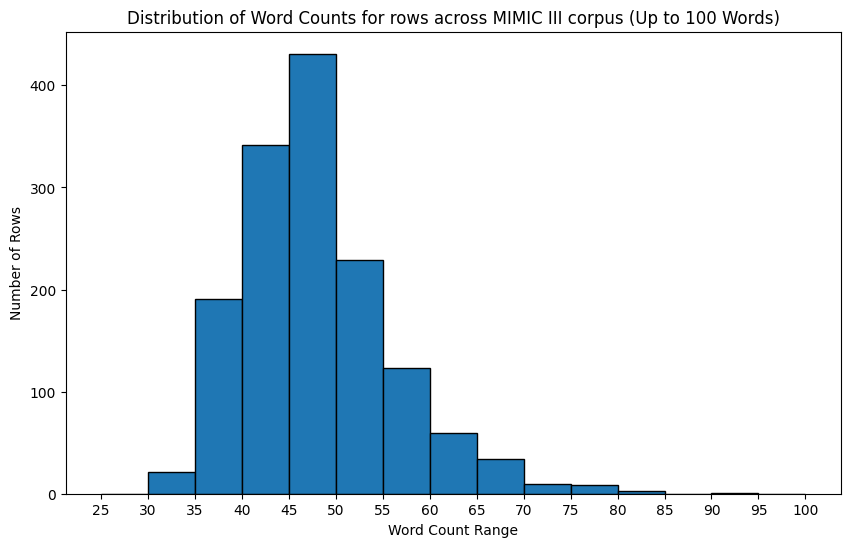

In [16]:
import matplotlib.pyplot as plt
# Define maximum word count to consider for plotting
max_word_count_for_plotting = 100

# Filter the DataFrame to include only rows within the specified word count range
filtered_df = data_df[data_df['word_count'] <= max_word_count_for_plotting]

# Define custom bins: 0-10, 10-20, etc., up to the max limit for plotting
bin_size = 5
bins = list(range(25, max_word_count_for_plotting + bin_size, bin_size))

# Plot the histogram without gaps
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['word_count'], bins=bins, edgecolor='black')
plt.xlabel("Word Count Range")
plt.ylabel("Number of Rows")
plt.title("Distribution of Word Counts for rows across MIMIC III corpus (Up to "+str(max_word_count_for_plotting)+" Words)")
plt.xticks(bins)  # Ensure x-axis labels match bin edges
plt.show()

In [40]:
# Define the range for filtering
min_words = 80
max_words = 85

# Filter the DataFrame for rows where 'B' value falls within the range
filtered_df = data_df[(data_df['word_count'] >= min_words) & (data_df['word_count'] <= max_words)]

print(filtered_df.size/2)

3.0


In [41]:
filtered_df.head(int(filtered_df.size/2)) 

,combined_column,word_count
963,"For the icd9_code 9139, diagnoses is Suprf inj...",82
1353,"For the icd9_code 9106, diagnoses is Foreign b...",80
1367,"For the icd9_code 9126, diagnoses is Foreign b...",80


# Healthcare NLP dataset

In [128]:
medquad = pd.read_csv('./data/medquad/medquad.csv')


print("no of rows in medquad :", len(medquad))

no of rows in medquad : 16412


In [129]:
medquad.head()

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


In [130]:
medquad['question'] = medquad['question'].astype(str)
medquad['answer'] = medquad['answer'].astype(str)
medquad['source'] = medquad['source'].astype(str)
medquad['focus_area'] = medquad['focus_area'].astype(str)

In [131]:
focus_area_count = medquad['focus_area'].nunique()
source_count = medquad['source'].nunique()
print(focus_area_count)
print(source_count)

5127
9


In [132]:
pattern = r'[^a-zA-Z0-9\s\[\]\(\)\.\,\?]'
medquad = medquad.replace(pattern, '',regex=True)

In [133]:
source_values_list = medquad['source'].unique().tolist()
for source_value in source_values_list:
    row_count = (medquad['source']==source_value).sum()
    print("Number of rows where source is "+source_value+" : "+str(row_count))

Number of rows where source is NIHSeniorHealth : 769
Number of rows where source is CancerGov : 729
Number of rows where source is MPlusHealthTopics : 981
Number of rows where source is GARD : 5394
Number of rows where source is CDC : 270
Number of rows where source is NHLBI : 559
Number of rows where source is NINDS : 1088
Number of rows where source is GHR : 5430
Number of rows where source is NIDDK : 1192


In [134]:
focus_areas = medquad['focus_area'].unique().tolist()
print(len(focus_areas))

5125


In [135]:
grouped = medquad.groupby('focus_area').agg({
    'question': list,
    'answer': list,
    'source': 'first'  # 'C' has the same value for a given 'D', so we can just take the first
}).reset_index()

# Interleave and combine 'A' and 'B' values
grouped['info'] = grouped.apply(lambda row: '\n'.join(f'{answer}' for answer in zip(row['answer'])), axis=1)

# Keep only the combined column and the other relevant columns
new_df = grouped[['info', 'source', 'focus_area']]

# Rename columns if desired
new_df.columns = ['info', 'source', 'focus_area']

print(new_df)

                                                   info source  \
0     ('Congenital adrenal hyperplasia (CAH) due to ...   GARD   
1     ('15q11.2 microdeletion refers to a chromosome...   GARD   
2     ('15q13.3 microdeletion is a chromosomal chang...    GHR   
3     ('15q13.3 microdeletion syndrome is a type of ...   GARD   
4     ('15q13.3 microduplication syndrome is a rare ...   GARD   
...                                                 ...    ...   
5120  ('Von Willebrand disease is a bleeding disorde...    GHR   
5121  ('Warfarin resistance is a condition in which ...    GHR   
5122  ('Warfarin sensitivity is a condition in which...    GHR   
5123  ('White sponge nevus is a condition characteri...    GHR   
5124  ('Xeroderma pigmentosum, which is commonly kno...    GHR   

                             focus_area  
0          11betahydroxylase deficiency  
1                 15q11.2 microdeletion  
2                 15q13.3 microdeletion  
3        15q13.3 microdeletion syndrome

In [136]:
new_df.to_csv('./data/medquad/modified_medquad.csv', index=False)

Read entire modified medquad csv from here

In [201]:
new_df = pd.read_csv('./data/medquad/modified_medquad.csv')

In [202]:
new_df.head()

,info,source,focus_area
0,('Congenital adrenal hyperplasia (CAH) due to ...,GARD,11betahydroxylase deficiency
1,('15q11.2 microdeletion refers to a chromosome...,GARD,15q11.2 microdeletion
2,('15q13.3 microdeletion is a chromosomal chang...,GHR,15q13.3 microdeletion
3,('15q13.3 microdeletion syndrome is a type of ...,GARD,15q13.3 microdeletion syndrome
4,('15q13.3 microduplication syndrome is a rare ...,GARD,15q13.3 microduplication syndrome


make sure total rows 5125

In [203]:
new_df.tail()

,info,source,focus_area
5120,('Von Willebrand disease is a bleeding disorde...,GHR,von Willebrand disease
5121,('Warfarin resistance is a condition in which ...,GHR,warfarin resistance
5122,('Warfarin sensitivity is a condition in which...,GHR,warfarin sensitivity
5123,('White sponge nevus is a condition characteri...,GHR,white sponge nevus
5124,"('Xeroderma pigmentosum, which is commonly kno...",GHR,xeroderma pigmentosum


choose ur subset here

In [204]:
new_df = new_df.iloc[0:131]

In [205]:
new_df['word_count'] = new_df['info'].apply(lambda x: len(x.split()))
min_length = new_df['word_count'].min()
max_length = new_df['word_count'].max()
avg_length = new_df['word_count'].mean()

print(f"Minimum word count: {min_length}")
print(f"Maximum word count: {max_length}")
print(f"Average word count: {avg_length:.2f}")

Minimum word count: 57
Maximum word count: 4712
Average word count: 572.08


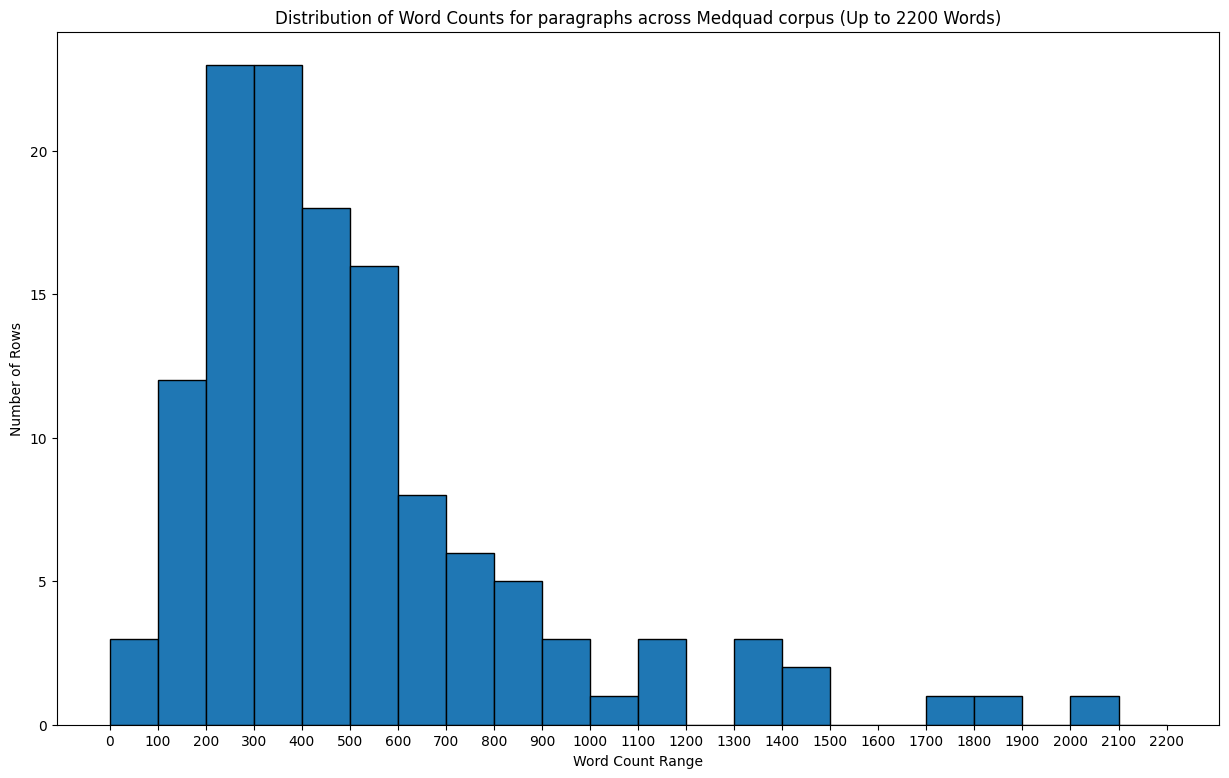

In [225]:
import matplotlib.pyplot as plt
# Define maximum word count to consider for plotting
max_word_count_for_plotting = 2200

# Filter the DataFrame to include only rows within the specified word count range
filtered_df = new_df[new_df['word_count'] <= max_word_count_for_plotting]

# Define custom bins: 0-10, 10-20, etc., up to the max limit for plotting
bin_size = 100
bins = list(range(0, max_word_count_for_plotting + bin_size, bin_size))

# Plot the histogram without gaps
plt.figure(figsize=(15, 9))
plt.hist(filtered_df['word_count'], bins=bins, edgecolor='black')
plt.xlabel("Word Count Range")
plt.ylabel("Number of Rows")
plt.title("Distribution of Word Counts for paragraphs across Medquad corpus (Up to "+str(max_word_count_for_plotting)+" Words)")
plt.xticks(bins)  # Ensure x-axis labels match bin edges
plt.show()

In [227]:
# Define the range for filtering
min_words = 3000
max_words = 4000

# Filter the DataFrame for rows where 'B' value falls within the range
filtered_df = new_df[(new_df['word_count'] >= min_words) & (new_df['word_count'] <= max_words)]

print(filtered_df.size/5)

1.0


In [228]:
# Display the filtered DataFrame
filtered_df.head(int(filtered_df.size/5))

,info,source,focus_area,word_count,question
64,('Key Points\n AIDSrelated...,CancerGov,AIDSRelated Lymphoma,3727,('Key Points\n AIDSrelated...


In [215]:
print(new_df.dtypes)

info          object
source        object
focus_area    object
word_count     int64
question      object
dtype: object


In [216]:
new_df['question'] = new_df['info'].astype(str)
new_df['source'] = new_df['source'].astype(str)
new_df['focus_area'] = new_df['focus_area'].astype(str)

In [217]:
import io
file_path = "./documents/medquad_sample.txt"
with io.open(file_path, 'w',encoding='utf-8') as file:
    for index, row in new_df.iterrows():
        output = ""
        output += "Now we shall discuss about the focus area : \""+row['focus_area']+"\" "
        output += "Source for this information is \""+row['source']+"\".\n\n"
        output += row['info']
        output += "\n\n"
        file.write(output)